In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


random.seed(42)

In [2]:
df = pd.read_csv('train_dataset.csv')
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
df.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.9])

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
10%,30.000000,150.000000,50.000000,70.000000,0.600000,0.600000,1.000000,1.000000,104.000000,64.000000,...,41.000000,73.000000,12.700000,1.000000,0.600000,16.000000,12.000000,13.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
90%,60.000000,175.000000,85.000000,94.000000,1.500000,1.500000,1.000000,1.000000,138.000000,88.000000,...,77.000000,158.000000,16.500000,1.000000,1.100000,37.000000,47.000000,78.000000,1.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [4]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting_blood_sugar  38984 non-null  int64  
 11  cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  hdl                  38984 non-null  int64  
 14  ldl                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

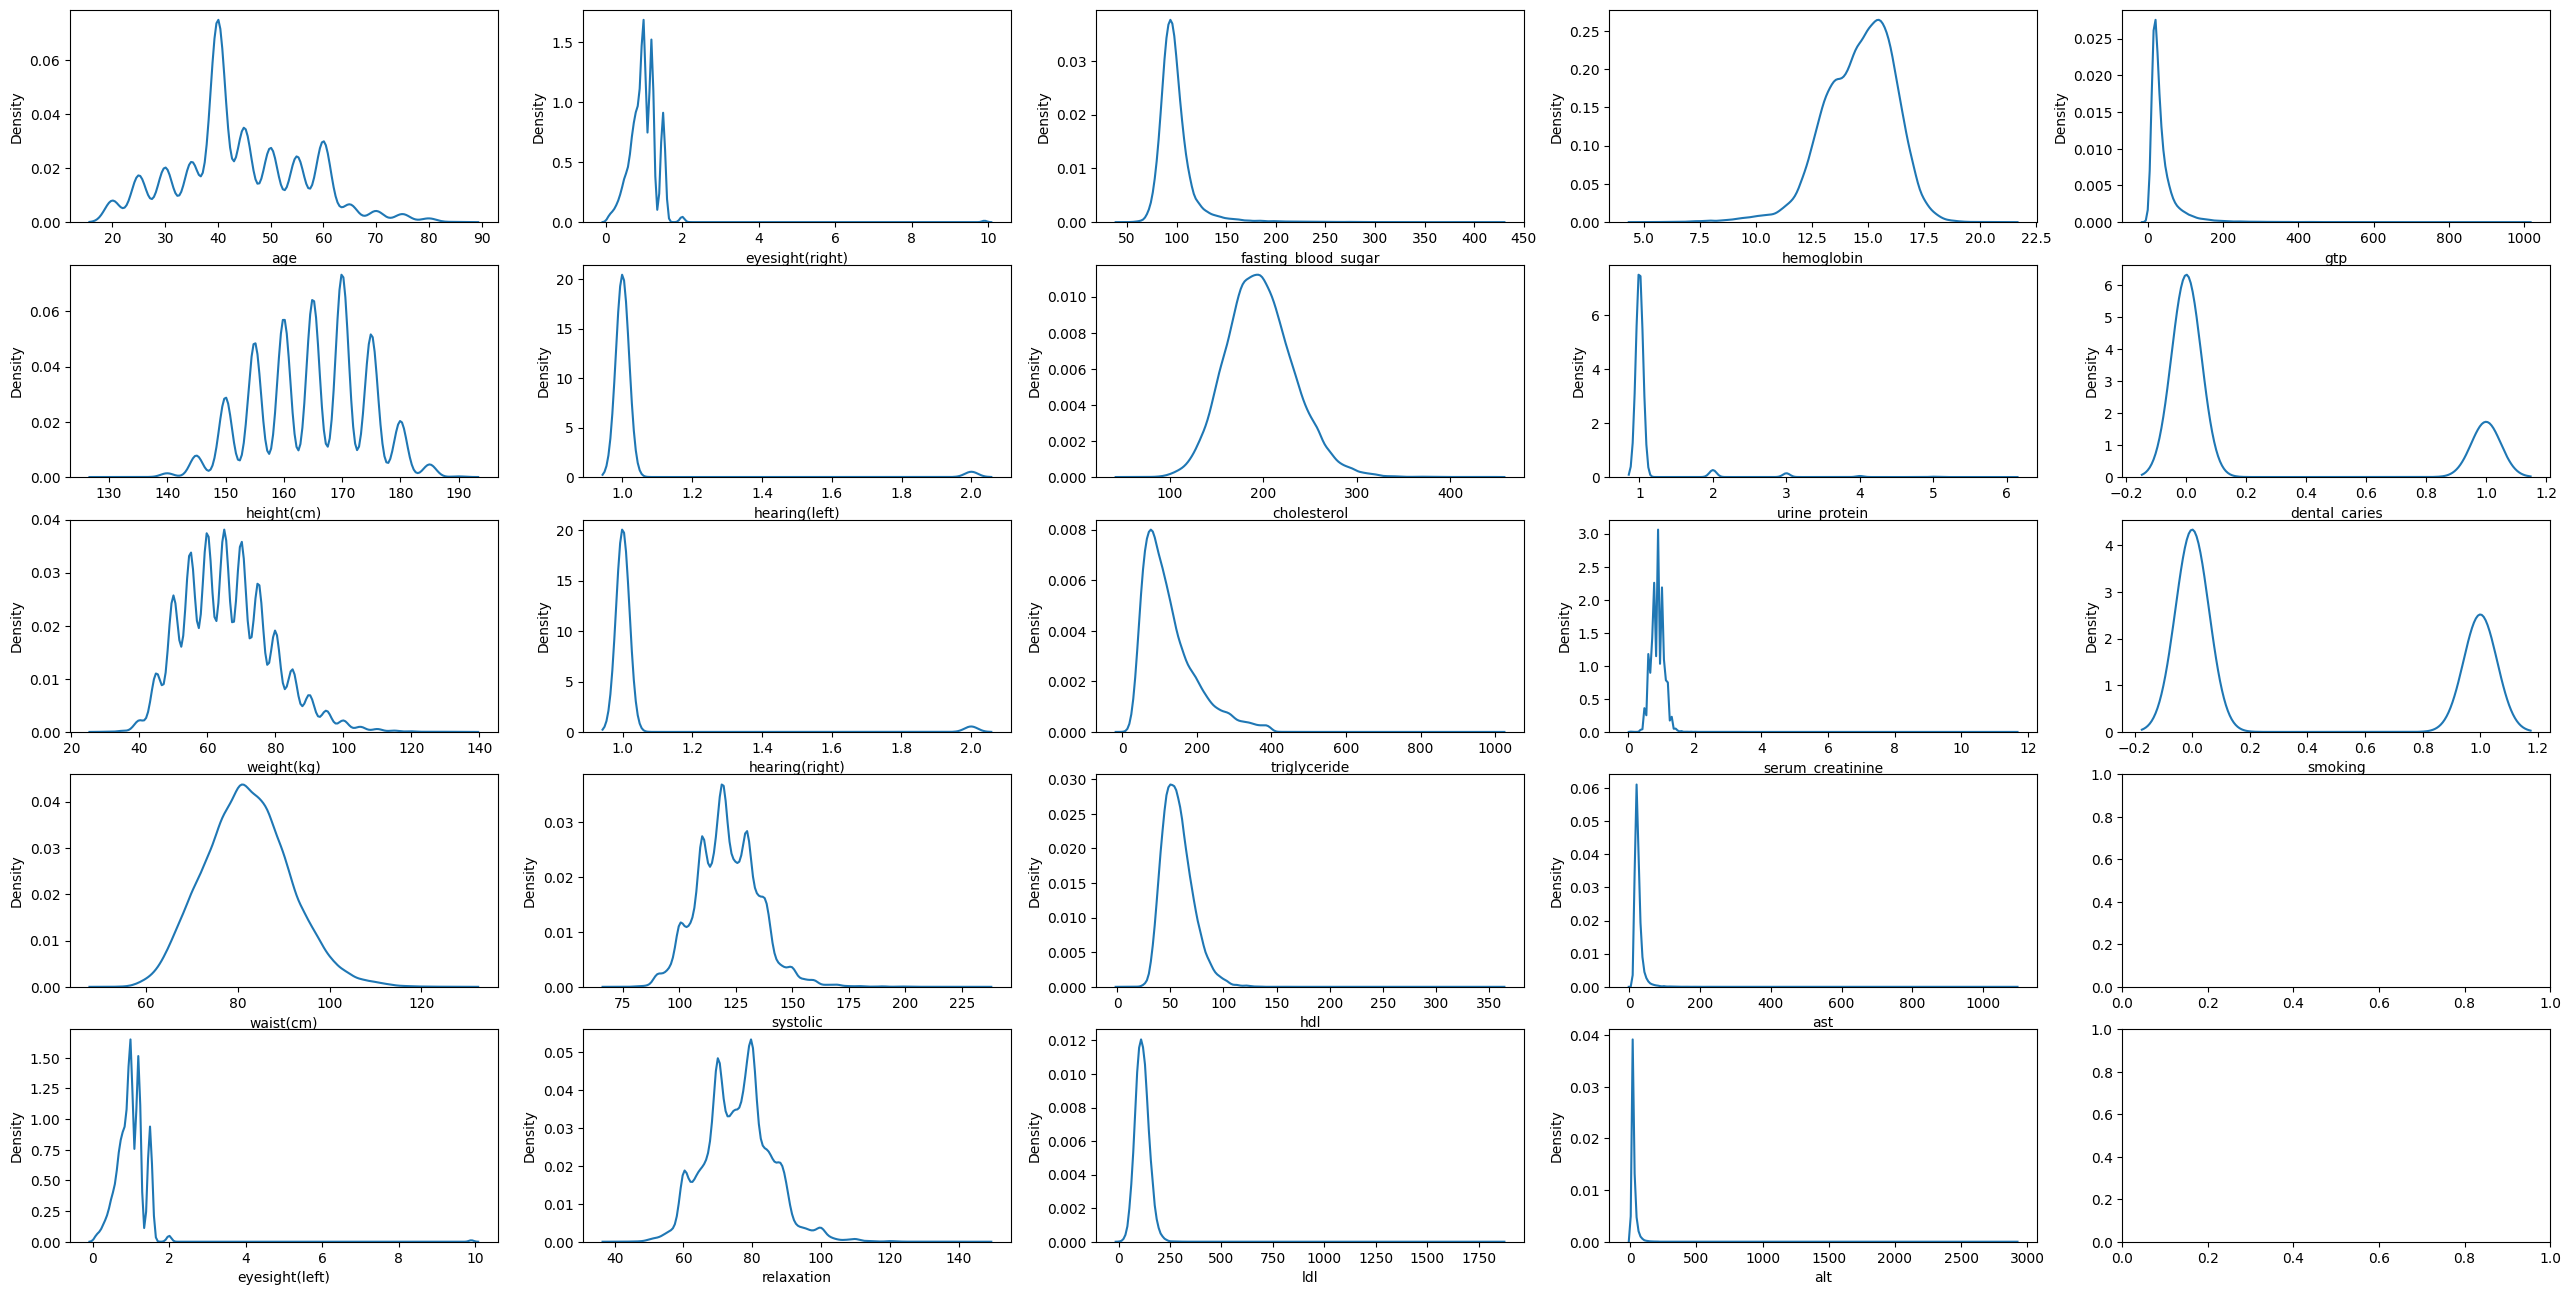

In [6]:
df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.kdeplot(data=df_num, x=col, ax=axes[idx % 5, idx // 5])

<Axes: >

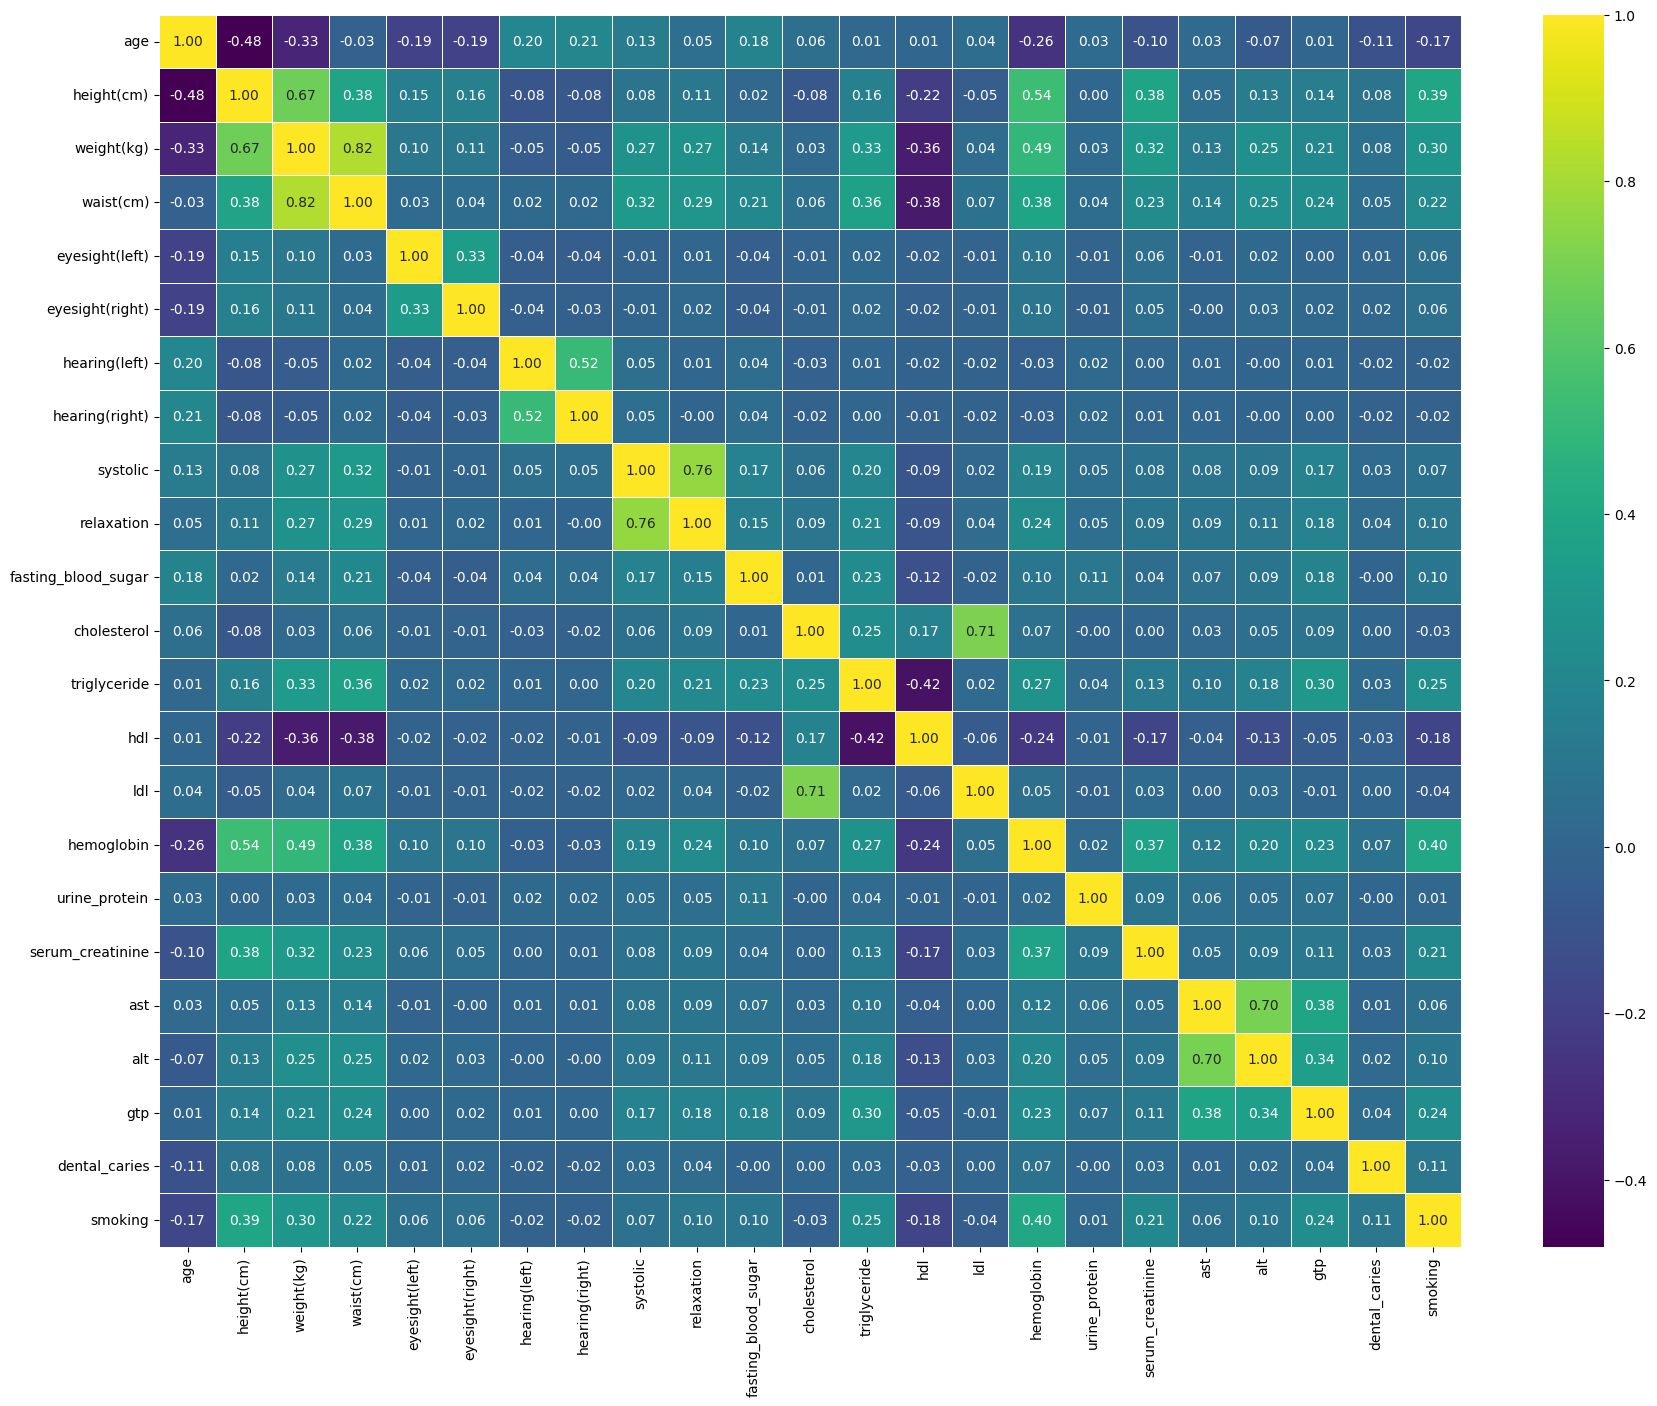

In [7]:
plt.figure(figsize=(21, 16))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

C:\Users\Anton\AppData\Local\Temp\ipykernel_6356\2417744581.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_num, x=col, hue='smoking', ax=axe)


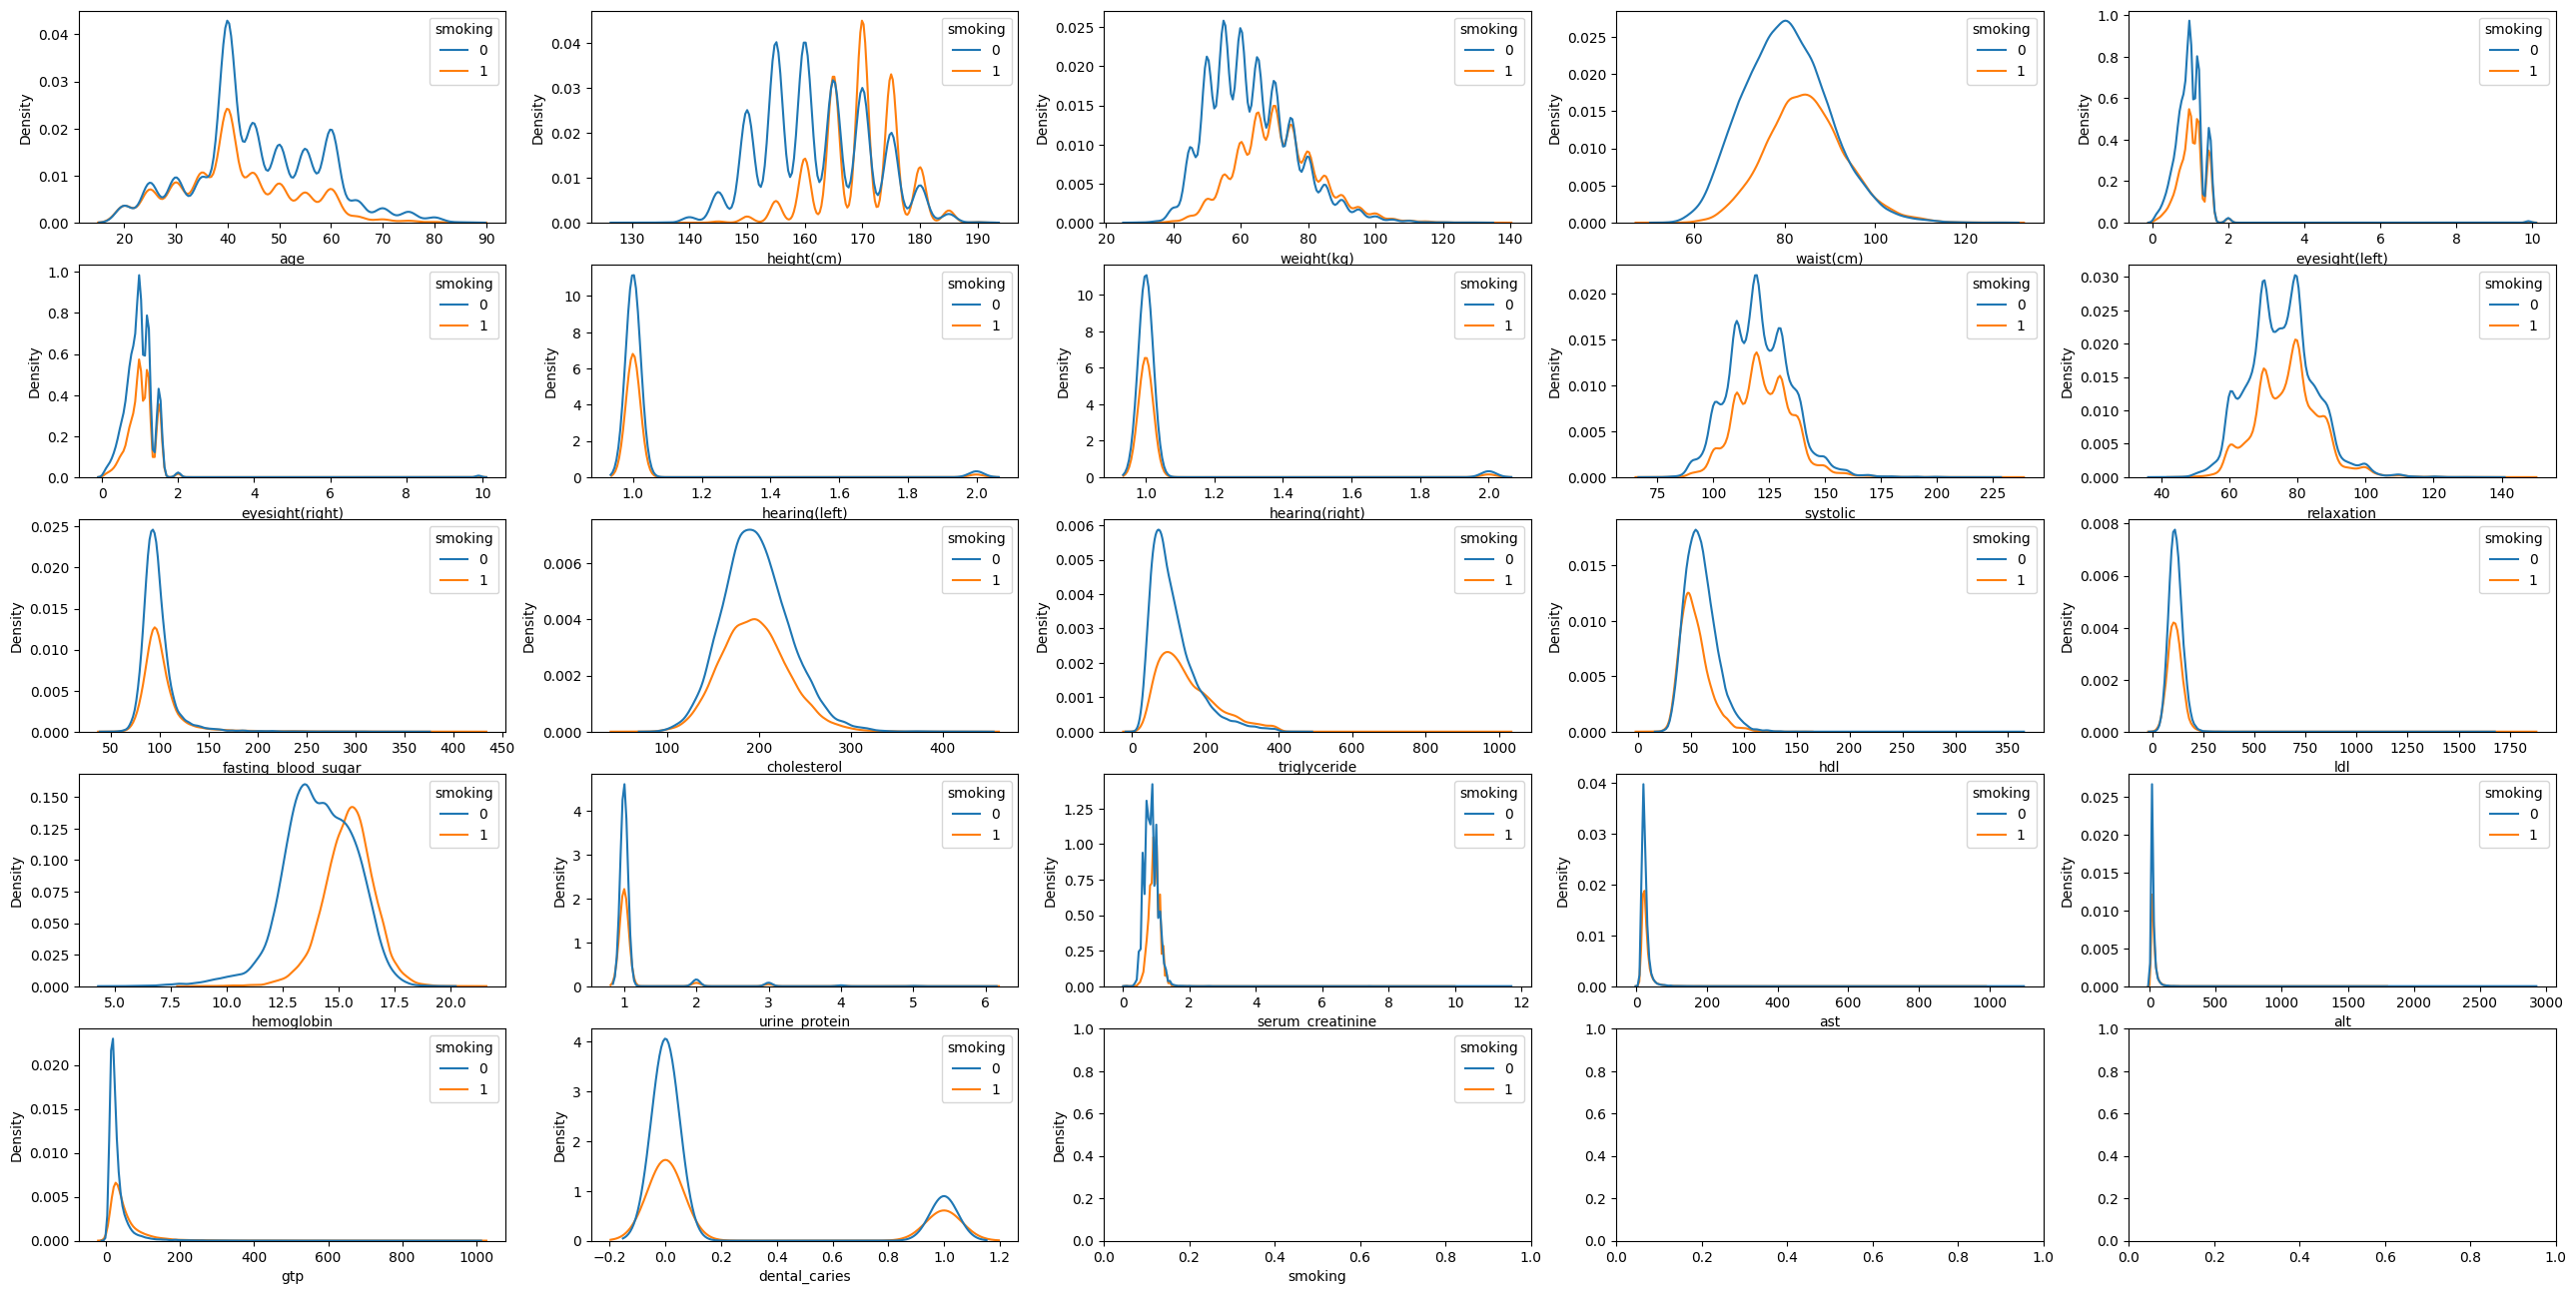

In [9]:
df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for axe, col in zip(axes.flatten(), df_num.columns):
    sns.kdeplot(data=df_num, x=col, hue='smoking', ax=axe)

In [10]:
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
dental_caries          0
smoking                0
dtype: int64

In [11]:
df['smoking'].value_counts()

smoking
0    24666
1    14318
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['smoking'])
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from hyperopt import fmin, STATUS_OK, tpe, hp, Trials, space_eval
from sklearn.model_selection import cross_val_score

space = {
        'n_estimators': hp.choice('n_estimators', [50, 70, 100, 120, 150]),  # Количество деревьев 
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),  # Скорость обучения 
        'max_depth': hp.choice('max_depth', [i for i in range(2, 10)])  # Максимальная глубина дерева 
}
def objective(params):

    model = GradientBoostingClassifier(**params)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores) #Усредняем оценку по разбивкам
    return {'loss': -mean_score, 'status': STATUS_OK}    

trials = Trials()

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print(f'best params: {best}')
best_params = space_eval(space, best)   #Оптимальные значения гиперпараметров


100%|██████████| 10/10 [05:41<00:00, 34.15s/trial, best loss: -0.7778878984607316]
best params: {'learning_rate': np.float64(0.17648071714337576), 'max_depth': np.int64(5), 'n_estimators': np.int64(4)}


In [17]:
final_model = GradientBoostingClassifier(**best_params)   #Создаем и обучаем модель с наилучшими гиперпараметрами

final_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.17648071714337576, max_depth=7,
                           n_estimators=150)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


#Критериии качества модели и точность предсказаний
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.78

Confusion Matrix:
[[4108  877]
 [ 819 1993]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4985
           1       0.69      0.71      0.70      2812

    accuracy                           0.78      7797
   macro avg       0.76      0.77      0.77      7797
weighted avg       0.78      0.78      0.78      7797



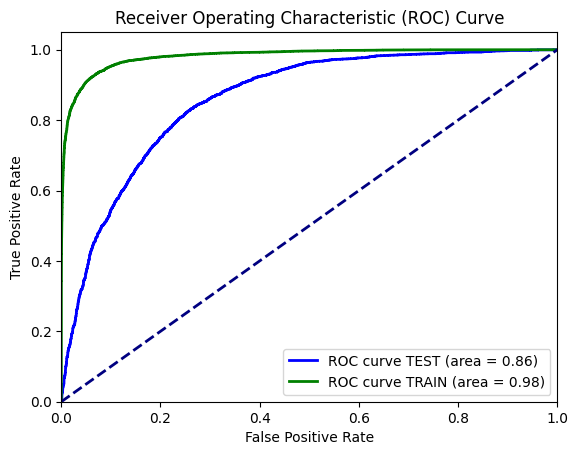

In [19]:
from sklearn.metrics import roc_curve, auc

y_test_prob = final_model.predict_proba(X_test)[:,1]
y_train_prob = final_model.predict_proba(X_train)[:, 1]


fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Построение ROC кривой
plt.figure()
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve TEST (area = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve TRAIN (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()